# Data Visualization  

## Pantheon dataset: Exploratory data analysis

The dataset is available as a CSV file. We first read tha dataset using pandas and remove entries that are not person i.e. those which are groups.

In [1]:
# Imports
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

import requests
import csv
import urllib.parse
from IPython.core.display import HTML
import wikipedia
from tqdm import tqdm

In [2]:
persons = pd.read_csv("https://storage.googleapis.com/pantheon-public-data/person_2020_update.csv.bz2", low_memory=False)

persons = persons[persons.is_group == False]
persons.head()

,id,wd_id,wp_id,slug,name,occupation,prob_ratio,gender,twitter,alive,...,deathdate,deathyear,bplace_geacron_name,dplace_geacron_name,is_group,l_,age,non_en_page_views,coefficient_of_variation,hpi
0,18934,Q9458,18934,Muhammad,Muhammad,RELIGIOUS FIGURE,0.0,M,NaN,False,...,0632-06-08,632.0,Mecca,NaN,False,27.918400,1450.0,5160422.0,3.199355,100.000000
1,17414699,Q720,17414699,Genghis_Khan,Genghis Khan,MILITARY PERSONNEL,0.0,M,NaN,False,...,1227-08-18,1227.0,NaN,NaN,False,25.843621,858.0,3249211.0,2.753641,97.723669
2,18079,Q762,18079,Leonardo_da_Vinci,Leonardo da Vinci,INVENTOR,0.0,M,NaN,False,...,1519-05-02,1519.0,NaN,NaN,False,17.545406,568.0,5362406.0,4.796629,97.460691
3,14627,Q935,14627,Isaac_Newton,Isaac Newton,PHYSICIST,0.0,M,NaN,False,...,1727-03-31,1726.0,NaN,NaN,False,21.608920,378.0,3431331.0,4.632474,96.836567
4,17914,Q255,17914,Ludwig_van_Beethoven,Ludwig van Beethoven,COMPOSER,0.0,M,NaN,False,...,1827-03-26,1827.0,NaN,Austria,False,19.796430,250.0,5179518.0,3.926626,96.583969


In [3]:
num_persons = len(persons.index)
print("In total, after removing the entities, we have {} number of persons in the dataset".format(num_persons))

In total, after removing the entities, we have 85574 number of persons in the dataset


In [4]:
print("The dataset contains the following columns: \n\n{}".format(list(persons.columns)))

The dataset contains the following columns: 

['id', 'wd_id', 'wp_id', 'slug', 'name', 'occupation', 'prob_ratio', 'gender', 'twitter', 'alive', 'l', 'hpi_raw', 'bplace_name', 'bplace_lat', 'bplace_lon', 'bplace_geonameid', 'bplace_country', 'birthdate', 'birthyear', 'dplace_name', 'dplace_lat', 'dplace_lon', 'dplace_geonameid', 'dplace_country', 'deathdate', 'deathyear', 'bplace_geacron_name', 'dplace_geacron_name', 'is_group', 'l_', 'age', 'non_en_page_views', 'coefficient_of_variation', 'hpi']


Out of these columns, we shall use **name, occupation, gender, bplace_name, bplace_lat, bplace_lon, bplace_country, birthyear, dplace_name, dplace_lat, dplace_lon, dplace_country, deathyear and wd_id**. 

-> wd_id is the Wikipedia id of the person that will be used to retrieve short bio and the picture of the person

- _bplace_ refers to the birthplace. 
- _dplace_ refers to death place.
- _lat_    refers to the latitude
- _lon_    refers to longitude

# Spatial data analysis - birth and death places

In [5]:
no_bloc_persons = persons.bplace_lat.isna().sum()
no_bloc_persons_percent = (no_bloc_persons/num_persons)*100

print("The number of persons with a missing birth location are {} which is {:.2f}% of the total available persons". format(no_bloc_persons, no_bloc_persons_percent))

The number of persons with a missing birth location are 3466 which is 4.05% of the total available persons


In [6]:
no_dloc_persons = persons.dplace_lat.isna().sum()
no_dloc_persons_percent = (no_dloc_persons/num_persons)*100

print("The number of persons with a missing death location are {} which is {:.2f}% of the total available persons". format(no_dloc_persons, no_dloc_persons_percent))

The number of persons with a missing death location are 48592 which is 56.78% of the total available persons


We should not take this number at the face value as some of these people are alive and hence there is no death locations. So, next we check the mission percentage of death locations for dead people.

In [7]:
dead_persons = persons[persons["alive"] == False]

no_dloc_dpersons = dead_persons.dplace_lat.isna().sum()
no_dloc_dpersons_percent = (no_dloc_dpersons/len(dead_persons))*100

print("The number of dead persons with a missing death location are {} which is {:.2f}% of the total dead persons". format(no_dloc_dpersons, no_dloc_dpersons_percent))

The number of dead persons with a missing death location are 3989 which is 9.74% of the total dead persons


Now, we look at the distribution of birth places on a map.

Text(0.5, 1.0, 'Birth Place Distribution of Famous People')

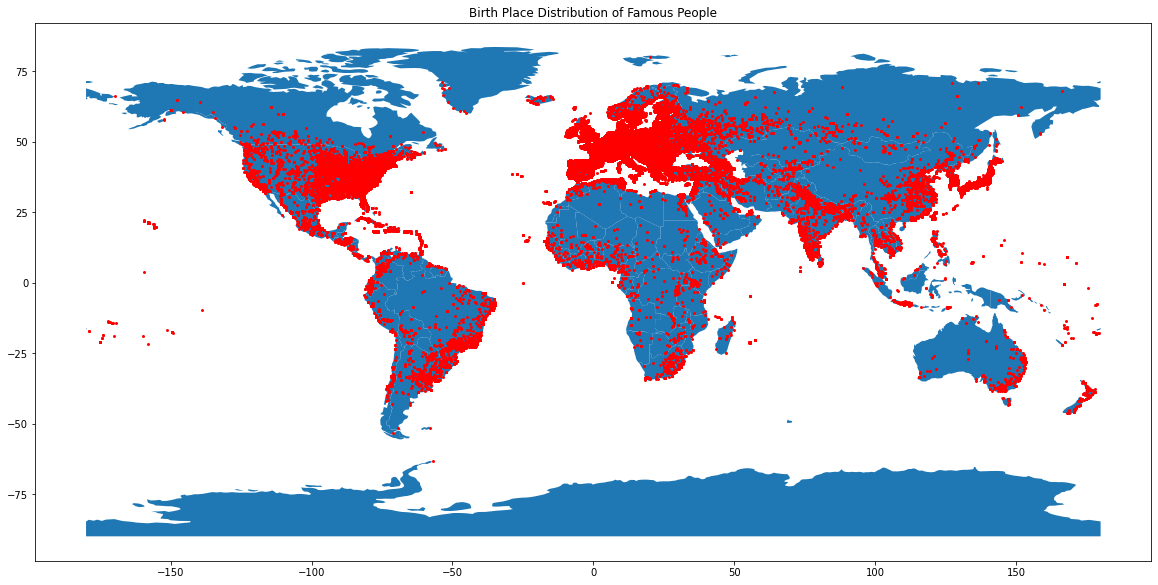

In [8]:
birth_loc_df = persons[["bplace_lon", "bplace_lat"]]

geometry = [Point(xy) for xy in zip(birth_loc_df['bplace_lon'], birth_loc_df['bplace_lat'])]
gdf = GeoDataFrame(birth_loc_df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 20)), marker='.', color='red', markersize=15).set_title('Birth Place Distribution of Famous People')

We observe that there is a high concentration of the people born in Europe and North America

Text(0.5, 1.0, 'Death Place Distribution of Famous People')

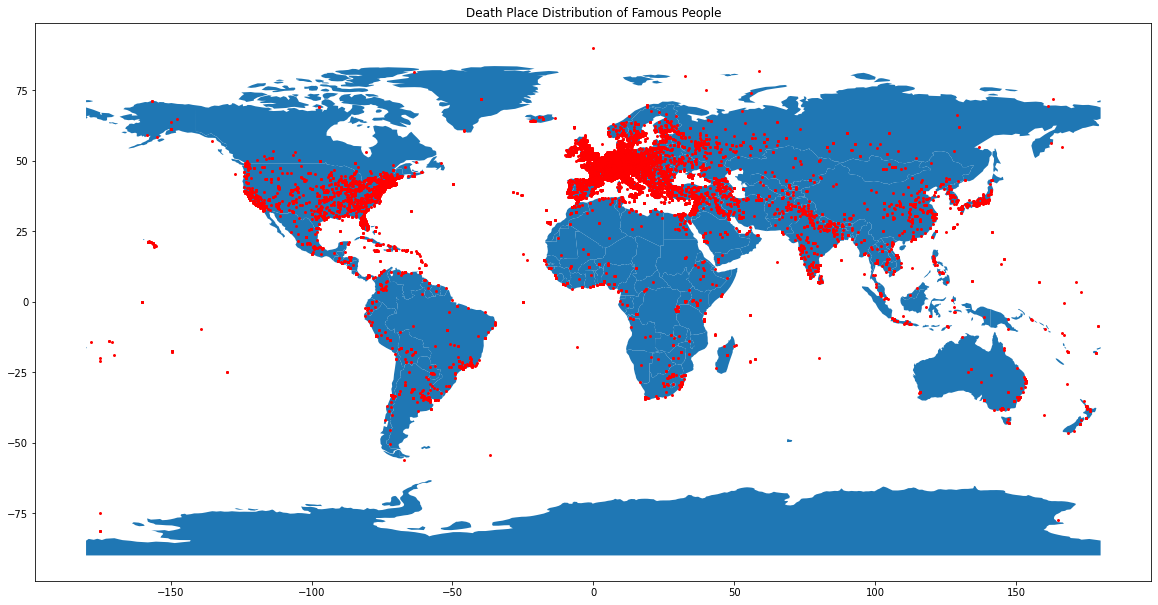

In [9]:
death_loc_df = persons[["dplace_lon", "dplace_lat"]]

geometry = [Point(xy) for xy in zip(death_loc_df['dplace_lon'], death_loc_df['dplace_lat'])]
gdf = GeoDataFrame(death_loc_df, geometry=geometry)   

gdf.plot(ax=world.plot(figsize=(20, 20)), marker='.', color='red', markersize=15).set_title('Death Place Distribution of Famous People')

We observe that there is a high concentration of the people died in Europe.

# Temporal data analysis - birth and death dates

In [10]:
no_byear_persons = persons.birthyear.isna().sum()
no_byear_persons_percent = (no_byear_persons/num_persons)*100

print("The number of persons with a missing birth year are {} which is {:.2f}% of the total available persons". format(no_byear_persons, no_byear_persons_percent))

The number of persons with a missing birth year are 429 which is 0.50% of the total available persons


In [11]:
no_dyear_persons = persons.deathyear.isna().sum()
no_dyear_persons_percent = (no_dyear_persons/num_persons)*100

print("The number of persons with a missing death year are {} which is {:.2f}% of the total available persons". format(no_dyear_persons, no_dyear_persons_percent))

The number of persons with a missing death year are 45200 which is 52.82% of the total available persons


We should not take this number at the face value as some of these people are alive and hence there is no death year. So, next we check the mission percentage of death year for dead people.

In [12]:
no_dyear_dpersons = dead_persons.deathyear.isna().sum()
no_dyear_dpersons_percent = (no_dyear_dpersons/len(dead_persons))*100

print("The number of dead persons with a missing death year are {} which is {:.2f}% of the total dead persons". format(no_dyear_dpersons, no_dyear_dpersons_percent))

The number of dead persons with a missing death year are 598 which is 1.46% of the total dead persons


Now, we perform a similar analysis for birth and death dates.

In [13]:
no_bday_persons = persons.birthdate.isna().sum()
no_bday_persons_percent = (no_bday_persons/num_persons)*100

print("The number of persons with a missing birth date are {} which is {:.2f}% of the total available persons". format(no_bday_persons, no_bday_persons_percent))

The number of persons with a missing birth date are 3619 which is 4.23% of the total available persons


In [14]:
no_dday_persons = persons.deathdate.isna().sum()
no_dday_persons_percent = (no_dday_persons/num_persons)*100

print("The number of persons with a missing death date are {} which is {:.2f}% of the total available persons". format(no_dday_persons, no_dday_persons_percent))

The number of persons with a missing death date are 47533 which is 55.55% of the total available persons


We should not take this number at the face value as some of these people are alive and hence there is no death date. So, next, we check the mission percentage of death year for dead people.

In [15]:
no_dday_dpersons = dead_persons.deathdate.isna().sum()
no_dday_dpersons_percent = (no_dday_dpersons/len(dead_persons))*100

print("The number of dead persons with a missing death date are {} which is {:.2f}% of the total dead persons". format(no_dday_dpersons, no_dday_dpersons_percent))

The number of dead persons with a missing death date are 2930 which is 7.15% of the total dead persons


As the number of missing elements in birth and death years are smaller than those birth and death dates, we shall use the year for the development of the visualization.

In [16]:
print(f"BC rounded to the closest century: {100-(persons[persons.birthyear<0].birthyear%100>0).sum()/persons[persons.birthyear<0].birthyear.count()*100}%")
print(f"AD rounded to the closest century: {100-(persons[persons.birthyear>0].birthyear%100>0).sum()/persons[persons.birthyear>0].birthyear.count()*100}%")

BC rounded to the closest century: 44.30322287789378%
AD rounded to the closest century: 1.6204289796361309%


# Categorical data analysis - occupation

In [17]:
no_occupation_persons = persons.occupation.isna().sum()
no_occupation_persons_percent = (no_occupation_persons/num_persons)*100

print("The number of persons with a missing occupation are {} which is {:.2f}% of the total available persons". format(no_occupation_persons, no_occupation_persons_percent))

The number of persons with a missing occupation are 0 which is 0.00% of the total available persons


Counting the number of people per occupation we get,

In [18]:
persons['occupation'].value_counts()

POLITICIAN       15585
SOCCER PLAYER    15051
ACTOR             9986
WRITER            5762
SINGER            3329
                 ...  
INSPIRATION          7
CRITIC               5
GAMER                4
GO PLAYER            2
BULLFIGHTER          1
Name: occupation, Length: 101, dtype: int64

<AxesSubplot:title={'center':'Distribution of occupation of the people'}>

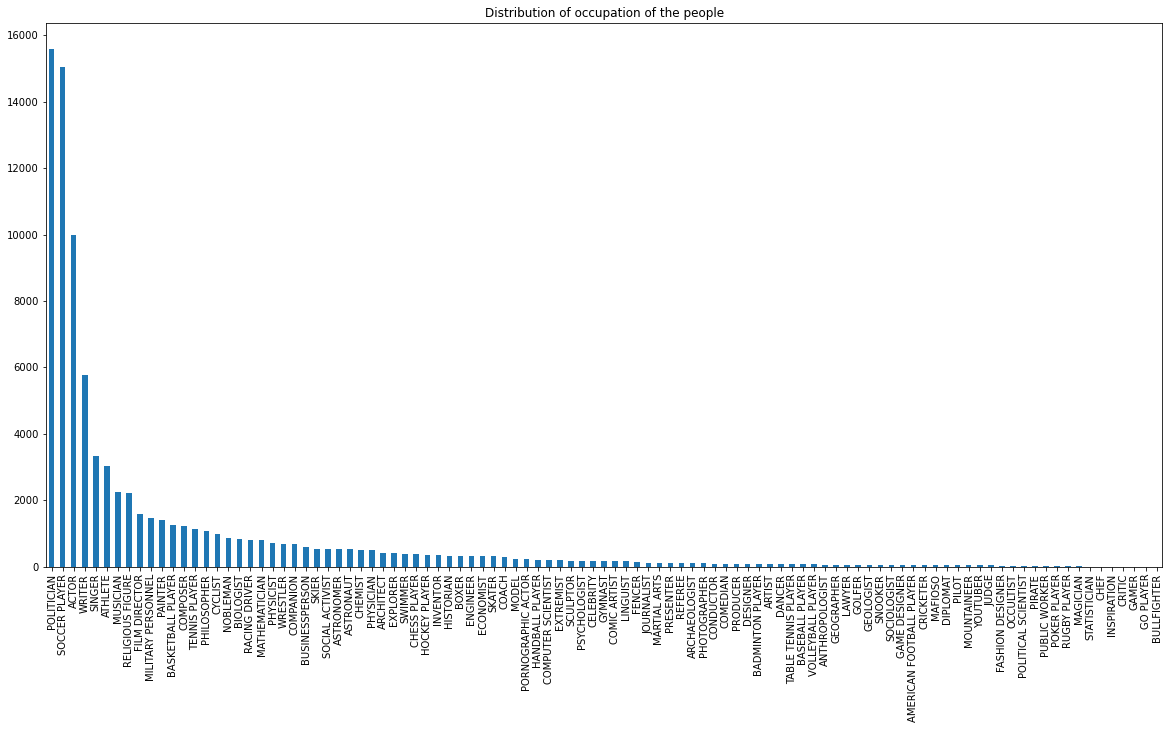

In [19]:
persons['occupation'].value_counts().plot(kind='bar', figsize=(20,10), title="Distribution of occupation of the people")

# The image acquisition code

Here, we create a set of functions to acquire the images of persons from their Wikipedia pages. For this, we use the Wikipedia id provided in the dataset and show a sample of retrieved images.

In [20]:
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

def find_commons_image(ids):
    query = "SELECT ?item ?pic WHERE { VALUES ?item {" + ' '.join(ids) + "}. ?item wdt:P18 ?pic}"
    result = requests.get("https://query.wikidata.org/sparql", params={'query': query}, headers={'Accept': 'text/csv'}).text
    data = list(csv.reader(result.split("\r\n"), delimiter=',', quotechar='"'))[:-1]
    df = pd.DataFrame(data[1:], columns=data[0])
    return df

images = find_commons_image(("wd:"+persons.wd_id).values[:10])


HTML(images.to_html(escape=False, formatters=dict(pic=path_to_image_html)))

,item,pic
0,http://www.wikidata.org/entity/Q254,
1,http://www.wikidata.org/entity/Q255,
2,http://www.wikidata.org/entity/Q517,
3,http://www.wikidata.org/entity/Q720,
4,http://www.wikidata.org/entity/Q762,
5,http://www.wikidata.org/entity/Q868,
6,http://www.wikidata.org/entity/Q935,
7,http://www.wikidata.org/entity/Q1048,
8,http://www.wikidata.org/entity/Q8409,
9,http://www.wikidata.org/entity/Q9458,


# The biography acquisition code

In [21]:
tqdm.pandas()
subset = persons[:5]
subset["summary"] = subset.progress_apply(lambda row: wikipedia.page(pageid=row.wp_id).summary, axis=1)

100%|██████████| 5/5 [00:03<00:00,  1.57it/s]
<ipython-input-21-305b983a50d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["summary"] = subset.progress_apply(lambda row: wikipedia.page(pageid=row.wp_id).summary, axis=1)


Some Sample Biographies:

In [22]:
subset.apply(lambda row: print(row["name"] + ": " + row.summary), axis=1)

Muhammad: Muhammad (Arabic: مُحَمَّد‎, pronounced [muˈħammad];  c. 570 CE – 8 June 632 CE) was an Arab religious, social, and political leader and the founder of Islam. According to Islamic doctrine, he was a prophet, sent to preach and confirm the monotheistic teachings of Adam, Abraham, Moses, Jesus, and other prophets. He is believed to be the final prophet of God in all the main branches of Islam, though some modern denominations diverge from this belief. Muhammad united Arabia into a single Muslim polity, with the Quran as well as his teachings and practices forming the basis of Islamic religious belief.
Born approximately 570 CE (Year of the Elephant) in the Arabian city of Mecca, Muhammad was orphaned at the age of six. He was raised under the care of his paternal grandfather Abd al-Muttalib, and upon his death, by his uncle Abu Talib. In later years, he would periodically seclude himself in a mountain cave named Hira for several nights of prayer. When he was 40, Muhammad report

0    None
1    None
2    None
3    None
4    None
dtype: object